# Saudi Used Car Sales Regression


### Business Problem Understanding

#### Context

syarah.com adalah sebuah platform penjualan mobil baru dan bekas yang berkantor pusat di Riyadh, Saudi Arabia. Melalui aplikasi syarah.com, pengguna dapat mencari, membeli mobil dan mendapatkan layanan purna jual seperti pengiriman mobil, garansi dan servis. Pengguna cukup mencari mobil yang diinginkan di web atau aplikasi dan memfilter berdasarkan harga, tahun dan berbagai kriteria lainnya. Harga yang ditampilkan di website dapat menjadi acuan, namun syarah.com juga menyediakan opsi untuk melakukan negosiasi harga

#### Problem Statement

Penentuan harga pada segmen Negotiable merupakan hak kedua belah pihak yang melakukan negosiasi, yaitu penjual dan pembeli. Di sisi lain, Syarah perlu menjaga harga mobil yang dijual agar tetap kompetitif.  Harga tersebut dipengaruhi berbagai faktor, di antaranya pasar penjualan, fasilitas tambahan yang diberikan, merek mobil, usia dan faktor-faktor lainnya. 

#### Goals

Tujuan dari pemodelan yang dilakukan adalah menentukan harga mobil yang tepat sesuai dengan karakteristik kendaraan serta tempat pemasaran mobil. 

#### Analytic Approach

Model yang digunakan untuk memprediksi harga adalah model berbasis regresi, dengan Price sebagai variabel target dan kolom-kolom lain dalam dataset sebagai prediktor. Setiap variabel prediktor  akan memiliki kontribusi sendiri dalam menentukan harga yang sesuai, namun setelah mempertimbangkan keterkaitan dengan harga serta bias  yang terjadi dari korelasi sesama variabel prediktor.

Dataset akan terbagi menjadi Non Negotiable dan Negotiable, dengan Non Negotiable memiliki harga yang tetap. Model akan dilatih dan diuji terlebih dahulu pada data Non-Negotiable  sebelum memprediksi harga pada data Non Negotiable

#### Metric Evaluation

Evaluasi akan menggunakan MAE, MAPE serta MSE, dan  bila model terpilih adalah linear maka akan juga menggunakan R squared. Kesemua metrik ini dibandingkan untuk mendapatkan metrik yang terkecil


### Data Understanding


Dataset ini memiliki 5624 baris yang diperoleh dari syarah.com. Setiap  baris berisi informasitentang satu unit mobil bekas, yang mencakup tipe, region, merek, transmisi, asal negara, ketersediaan fasilitas, tahun, ukuran mesin, mil di odometer, status negosiasi serta harga. Adapun penjelasan masing-masing kolom yaitu sebagi berikut:

#### Features

* Type: Tipe mobil
* Region: Wilayah tempat mobil akan dipasarkan
* Make: Merek mobil
* Gear_Type: Tipe transmisi/gear yang digunakan (Auto/Matic)
* Origin: Asal negara mobil bekas 
* Options: Kelengkapan fasilitas terpasang pada mobil, seperti kamera, sunroof, power window dll.,  referensi: (link)
* Year: Tahun pembuatan
* Engine_Size: Ukuran mesin mobil bekas
* Mileage: Mil yang sudah ditempuh mobil bekas
* Negotiable: True jika Price 0, harga dapat dinegosiasikan
* Price: Used car price (dalam Saudi riyal)

In [1]:
## Library

import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sb
# from sklearn.tree import plot_tree


# Preprocessing
import category_encoders as ce # mengandung binary encoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures


# Split
from sklearn.model_selection import train_test_split

# Model
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor


# Accuracy
# from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, mean_squared_log_error
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV, StratifiedKFold

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load dataset
used_cars_raw=pd.read_csv('data_saudi_used_cars.csv')
used_cars_raw

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


In [3]:
used_cars_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


In [4]:
listData= []
for col in used_cars_raw.columns :
    listData.append( [col, used_cars_raw.dtypes[col], used_cars_raw[col].isna().sum(), used_cars_raw[col].nunique(), used_cars_raw[col].unique()])

tabelDesc = pd.DataFrame(columns=['Nama Kolom', 'Tipe Data','Missing Value','Jumlah Nilai Unik', 'Deskripsi Nilai Unik'],
                     data=listData)
print(used_cars_raw.shape)

pd.options.display.max_colwidth=None


tabelDesc

(5624, 11)


,Nama Kolom,Tipe Data,Missing Value,Jumlah Nilai Unik,Deskripsi Nilai Unik
0,Type,object,0,347,"[Corolla, Yukon, Range Rover, Optima, FJ, CX3, Cayenne S, Sonata, Avalon, LS, C300, Land Cruiser, Hilux, Tucson, Caprice, Sunny, Pajero, Azera, Focus, 5, Spark, Camry, Pathfinder, Accent, ML, Tahoe, Yaris, Suburban, A, Altima, Traverse, Expedition, Senta fe, Liberty, 3, X, Elantra, Land Cruiser Pickup, VTC, Malibu, The 5, A8, Patrol, Grand Cherokee, SL, Previa, SEL, Aveo, MKZ, Victoria, Datsun, Flex, GLC, ES, Edge, 6, Escalade, Innova, Navara, H1, G80, Carnival, Symbol, Camaro, Accord, Avanza, Land Cruiser 70, Taurus, C5700, Impala, Optra, S, Other, Cerato, Furniture, Murano, Explorer, LX, Pick up, Charger, H6, BT-50, Hiace, Ranger, Fusion, Rav4, Ciocca, CX9, Kona, Sentra, Sierra, Durango, CT-S, Sylvian Bus, Navigator, Opirus, Marquis, The 7, FX, Creta, ...]"
1,Region,object,0,27,"[Abha, Riyadh, Hafar Al-Batin, Aseer, Makkah, Dammam, Yanbu, Al-Baha, Jeddah, Hail, Khobar, Al-Ahsa, Jazan, Al-Medina, Al-Namas, Tabouk, Taef, Qassim, Arar, Jubail, Sabya, Al-Jouf, Najran, Wadi Dawasir, Qurayyat, Sakaka, Besha]"
2,Make,object,0,58,"[Toyota, GMC, Land Rover, Kia, Mazda, Porsche, Hyundai, Lexus, Chrysler, Chevrolet, Nissan, Mitsubishi, Ford, MG, Mercedes, Jeep, BMW, Audi, Lincoln, Cadillac, Genesis, Renault, Honda, Suzuki, Zhengzhou, Dodge, HAVAL, INFINITI, Isuzu, Changan, Aston Martin, Mercury, Great Wall, Other, Rolls-Royce, MINI, Volkswagen, BYD, Geely, Victory Auto, Classic, Jaguar, Daihatsu, Maserati, Hummer, GAC, Lifan, Bentley, Chery, Peugeot, Foton, Škoda, Fiat, Iveco, SsangYong, FAW, Tata, Ferrari]"
3,Gear_Type,object,0,2,"[Manual, Automatic]"
4,Origin,object,0,4,"[Saudi, Gulf Arabic, Other, Unknown]"
5,Options,object,0,3,"[Standard, Full, Semi Full]"
6,Year,int64,0,50,"[2013, 2014, 2015, 2020, 2019, 2012, 2016, 1998, 2011, 2008, 1982, 1985, 2018, 1983, 2021, 2017, 2002, 2010, 2009, 2004, 2001, 1986, 2007, 1999, 2005, 1977, 1991, 2003, 1995, 2006, 1997, 1993, 1996, 2000, 1990, 1965, 1980, 1987, 1994, 1988, 1989, 1978, 2022, 1975, 1964, 1984, 1979, 1992, 1963, 1981]"
7,Engine_Size,float64,0,71,"[1.4, 8.0, 5.0, 2.4, 4.0, 2.0, 4.8, 3.5, 4.6, 5.7, 2.7, 1.0, 3.0, 1.6, 1.5, 3.3, 6.2, 2.5, 5.3, 3.6, 5.4, 1.7, 3.7, 9.0, 4.7, 4.5, 3.8, 5.5, 2.6, 1.8, 1.2, 6.0, 6.9, 3.2, 5.9, 2.2, 5.6, 1.1, 2.9, 4.1, 1.3, 4.4, 2.8, 3.4, 8.8, 6.1, 7.0, 1.9, 7.5, 4.3, 6.5, 3.1, 6.3, 6.4, 5.8, 8.5, 2.3, 6.6, 7.2, 4.2, 5.1, 7.4, 5.2, 2.1, 6.7, 7.8, 3.9, 8.7, 4.9, 6.8, 8.9]"
8,Mileage,int64,0,1716,"[421000, 80000, 140000, 220000, 49000, 25000, 189000, 155, 110864, 300, 200, 79000, 299000, 17000, 209, 340000, 30000, 71000, 85000, 500000, 290, 74715, 250, 284000, 98000, 3400, 108, 350000, 550000, 204000, 139240, 296, 105920, 187000, 10000, 18500, 292000, 280000, 270000, 345500, 110000, 247000, 55800, 92000, 27000, 600000, 307801, 62000, 38000, 89000, 137000, 422000, 208000, 11000, 245000, 500, 150000, 81000, 156000, 42000, 228000, 24000, 266000, 98100, 182000, 210800, 88000, 214000, 82808, 4000, 417970, 70000, 115, 270373, 91440, 45000, 96000, 50100, 35449, 180, 66200, 100, 349000, 168000, 105000, 130000, 212000, 139740, 256, 280, 73000, 240000, 866, 216, 183000, 148000, 4358765, 188257, 117000, 160000, ...]"
9,Negotiable,bool,0,2,"[True, False]"


### EDA

In [5]:
used_cars=used_cars_raw.copy()
used_cars['Age']=2024-used_cars['Year']
used_cars=used_cars.drop(['Year'],axis=1)
used_cars.tail(5)

,Type,Region,Make,Gear_Type,Origin,Options,Engine_Size,Mileage,Negotiable,Price,Age
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2.5,78794,False,68000,6
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2.5,58000,True,0,4
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,5.3,48000,False,145000,8
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2.5,81000,False,154000,8
5623,ES,Jeddah,Lexus,Automatic,Other,Full,3.5,115000,True,0,7


#### Feature-Target correlation

In [6]:
used_cars=used_cars_raw.copy()
used_cars['Age']=2024-used_cars['Year']
used_cars=used_cars.drop(['Year'],axis=1)
used_cars_f=used_cars[(used_cars['Age'] <= 21)&(used_cars['Mileage'] <= 433000.0)&(used_cars['Price'] <= 182331.5)&(used_cars['Price'] > 0)]

from scipy.stats import kruskal

categorical=['Type','Region','Make','Gear_Type','Origin','Options']
numerical=['Engine_Size','Age','Mileage','Price']

for num in numerical:
    for cat in categorical:
        group=[used_cars_f[used_cars_f[cat] == i]['Price'].values for i in used_cars_f[cat].unique()]
        _,pvalue=kruskal(*group)
        print(f'Pvalue {cat}-{num}:',pvalue)
    
    print('\n')

Pvalue Type-Engine_Size: 2.8399424452907227e-215
Pvalue Region-Engine_Size: 2.9760493714036764e-11
Pvalue Make-Engine_Size: 5.718064626680353e-124
Pvalue Gear_Type-Engine_Size: 0.0019264778581384106
Pvalue Origin-Engine_Size: 1.6713119923904095e-25
Pvalue Options-Engine_Size: 6.680467296824282e-66


Pvalue Type-Age: 2.8399424452907227e-215
Pvalue Region-Age: 2.9760493714036764e-11
Pvalue Make-Age: 5.718064626680353e-124
Pvalue Gear_Type-Age: 0.0019264778581384106
Pvalue Origin-Age: 1.6713119923904095e-25
Pvalue Options-Age: 6.680467296824282e-66




Pvalue Type-Mileage: 2.8399424452907227e-215
Pvalue Region-Mileage: 2.9760493714036764e-11
Pvalue Make-Mileage: 5.718064626680353e-124
Pvalue Gear_Type-Mileage: 0.0019264778581384106
Pvalue Origin-Mileage: 1.6713119923904095e-25
Pvalue Options-Mileage: 6.680467296824282e-66


Pvalue Type-Price: 2.8399424452907227e-215
Pvalue Region-Price: 2.9760493714036764e-11
Pvalue Make-Price: 5.718064626680353e-124
Pvalue Gear_Type-Price: 0.0019264778581384106
Pvalue Origin-Price: 1.6713119923904095e-25
Pvalue Options-Price: 6.680467296824282e-66




Dengan p-value yang lebih kecil dari 0,05, H0 ditolak dan setiap kelompok pada masing-masing variabel kategorik memiliki perbedaan median harga mobil yang signifikan

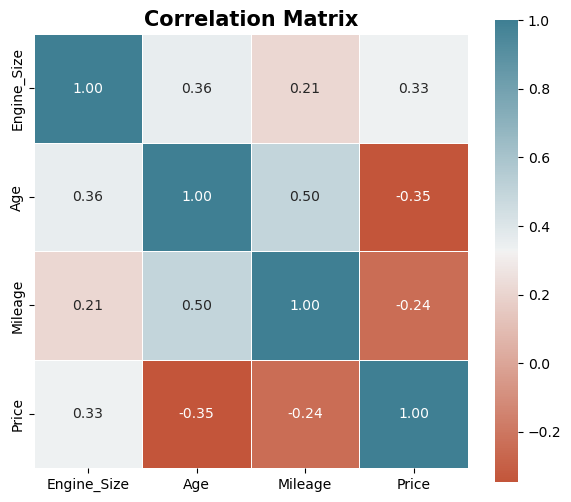

In [7]:
# Correlation matrix
plt.figure(figsize=(7,6))
palette=sb.diverging_palette(20, 220, n=256)
corr = used_cars_f[['Engine_Size','Age','Mileage','Price']].corr(method='pearson')
sb.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

#### Outliers

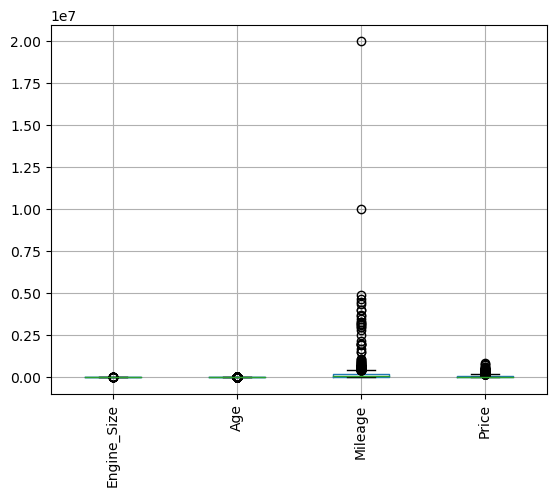

In [8]:
used_cars[['Engine_Size','Age','Mileage','Price']].boxplot(rot=90)
plt.show()

In [9]:
def find_anomalies(data):
    
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}') 
    return limit_bawah, limit_atas

def percent_anomalies(num_cols):
    for nc in num_cols:
        print('Column:',nc)
        bawah,atas=find_anomalies(used_cars[nc])
        count_outliers=len(used_cars[(used_cars[nc]<=bawah)|(used_cars[nc]>=atas)])
        pct_outliers=count_outliers/len(used_cars)
        print(f'persentase outlier: {pct_outliers*100}\n')

num_cols=['Engine_Size','Age','Mileage','Price']
percent_anomalies(num_cols)


Column: Engine_Size
IQR: 2.5
limit_bawah: -1.75
limit_atas: 8.25
persentase outlier: 0.40896159317211944

Column: Age
IQR: 6.0
limit_bawah: -3.0
limit_atas: 21.0
persentase outlier: 5.245376955903272

Column: Mileage
IQR: 158000.0
limit_bawah: -199000.0
limit_atas: 433000.0
persentase outlier: 3.1294452347083923

Column: Price
IQR: 72932.5
limit_bawah: -109398.75
limit_atas: 182331.25
persentase outlier: 4.640825035561877



Pada keempat variabel kategorik, proporsi terbanyak outlier dimiliki oleh kolom Age, disusul Price, Mileage serta Engine_Size. Dengan proporsi yang relatif kecil, di bawah 10%, kita dapat mengexclude row yang mengandung salah satu outlier. Hal ini memiliki resiko terbatasnya rentang validitas model yang akan digenerate. Sleanjutnya, kita melihat efek penghilangan outlier ini pada masing-masing variabel.

Feature Engine_Size is not normal distribution
Feature Age is not normal distribution
Feature Mileage is not normal distribution
Feature Price is not normal distribution


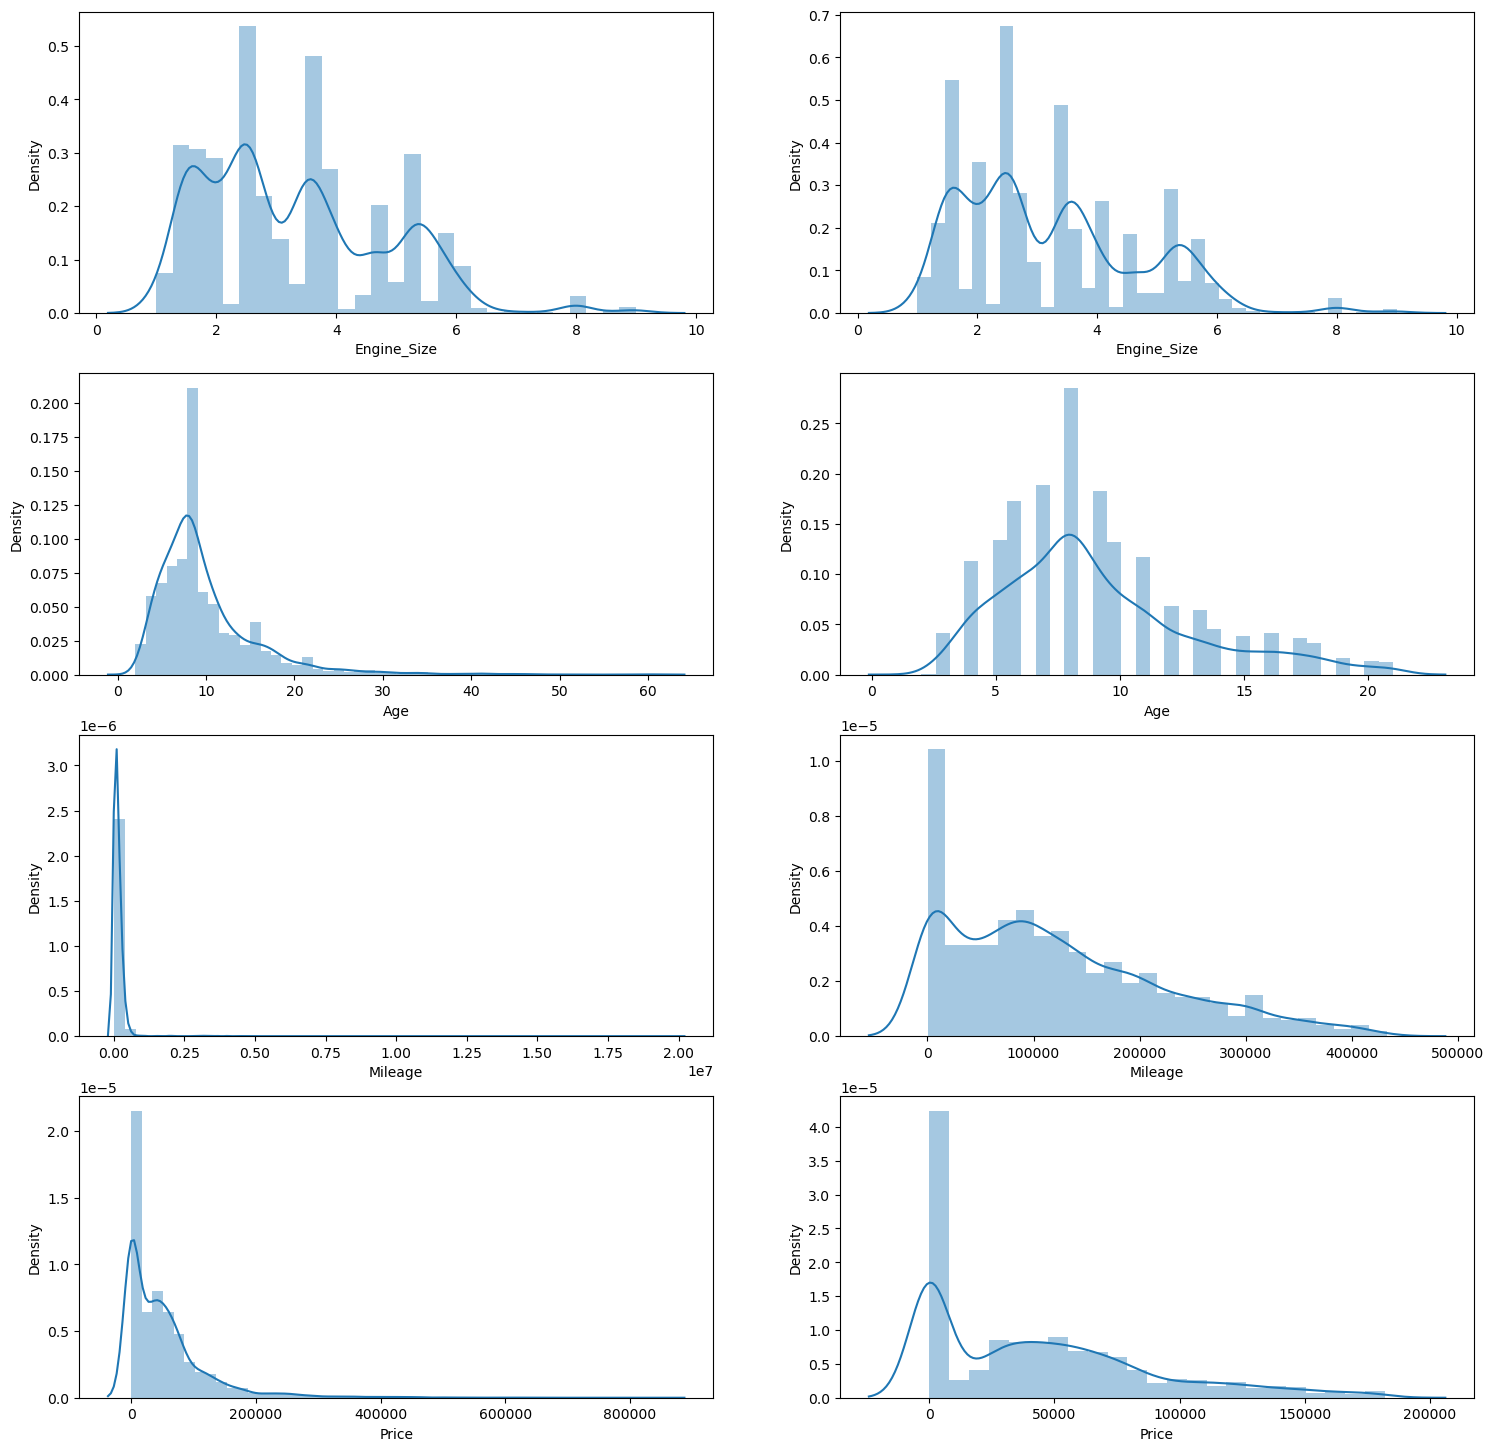

In [10]:
from scipy.stats import shapiro
# Melakukan filtering pada data
num_cols=['Engine_Size','Age','Mileage','Price']
used_cars_f=used_cars[(used_cars['Age'] <= 21)&(used_cars['Mileage'] <= 433000.0)&(used_cars['Price'] <= 182331.5)]

for feature in num_cols:
    _, pvalue = shapiro(used_cars_f[feature])

    if (pvalue > 0.05):
        print(f"Feature {feature} is normal distribution")
    else:
        print(f"Feature {feature} is not normal distribution")

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(len(num_cols),2, figsize=(18, 18))
for i in range(len(num_cols)):
    sb.distplot(used_cars[num_cols[i]], ax=axes[i, 0])
    sb.distplot(used_cars_f[num_cols[i]], ax=axes[i, 1])
    # axes[i, 0].set_xlabel(num_cols[i])
    # axes[i, 1].set_xlabel('Range Selected ',num_cols[i])

plt.show()

Secara grafis terlihat sekilas bahwa outlier telah dihilangkan. Di sisi lain, diketahui bahwa keempat variabel tidak menunjukkan distribusi normal. Dnegan demikian, evaluasi yang akan dilakukan pada model akan dominan menggunakan Mean Absolute Error

In [11]:
from scipy.stats import shapiro
# Melakukan filtering pada data
num_cols=['Engine_Size','Age','Mileage','Price']
used_cars_f=used_cars[(used_cars['Age'] <= 21)&(used_cars['Mileage'] >0)&(used_cars['Mileage'] <= 433000.0)&(used_cars['Price'] <= 182331.5)&(used_cars['Age'] >0)]

for feature in num_cols:
    _, pvalue = shapiro(used_cars_f[feature])

    if (pvalue > 0.05):
        print(f"Feature {feature} is normal distribution")
    else:
        print(f"Feature {feature} is not normal distribution")

Feature Engine_Size is not normal distribution
Feature Age is not normal distribution
Feature Mileage is not normal distribution
Feature Price is not normal distribution


### Data Preprocessing

Berdasarkan eksplorasi yang telah dilakukan, terdapat beberapa penyesuaian, yaitu konversi kolom tahun menjadi usia serta menghilangkan outlier pada variabel Engine_Size, Age Mileage dan Price

In [12]:
used_cars=used_cars_raw.copy()
used_cars['Age']=2024-used_cars['Year']
used_cars=used_cars.drop(['Year'],axis=1)
used_cars.tail(5)

,Type,Region,Make,Gear_Type,Origin,Options,Engine_Size,Mileage,Negotiable,Price,Age
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2.5,78794,False,68000,6
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2.5,58000,True,0,4
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,5.3,48000,False,145000,8
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2.5,81000,False,154000,8
5623,ES,Jeddah,Lexus,Automatic,Other,Full,3.5,115000,True,0,7


In [13]:
used_cars_f=used_cars[(used_cars['Age'] <= 21)&(used_cars['Mileage'] >0)&(used_cars['Mileage'] <= 433000.0)&(used_cars['Price'] <= 182331.5)&(used_cars['Age'] >0)]

used_cars_f

,Type,Region,Make,Gear_Type,Origin,Options,Engine_Size,Mileage,Negotiable,Price,Age
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,1.4,421000,True,0,11
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,8.0,80000,False,120000,10
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2.4,220000,False,42000,9
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,4.0,49000,True,0,4
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2.0,25000,False,58000,5
...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2.5,78794,False,68000,6
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2.5,58000,True,0,4
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,5.3,48000,False,145000,8
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2.5,81000,False,154000,8


Dataset juga kita bagi dua, yaitu dataset mobil yang Negotiable dan mobil yang non-negotiable. Kita akan fokus menemukan model yang dapat memprediksi harga mobil berdasarkan harga jual di pasar, lalu kemudian mempredikasi data baru yang belum dikenal model

In [14]:
topred=used_cars_f[used_cars_f['Negotiable']==True].drop(['Negotiable'],axis=1)
trainvaltest=used_cars_f[(used_cars_f['Negotiable']==False)&(used_cars_f['Price']>0)].drop(['Negotiable'],axis=1)



X_topred=pd.DataFrame(topred.drop(columns='Price'))
X_trainvaltest=pd.DataFrame(trainvaltest.drop(columns='Price'))
y_topred=topred.Price
y_trainvaltest=trainvaltest.Price




### Modelling

#### Encoding and Transformation

Regresi linear membutuhkan data yang bersifat numerik sehingga kolom-kolom kategorik harus dikonversi menjadikolom numerik.
Selain itu,kolom-kolom numerik juga tidak berada pada skala yang sama, sehingga membutuhkan scaling, dengan jenis yang bergantung pada keberadaan outlier pada masing-masing kolom

Adapun jenis perlakuan yang akan diterapkan pada masing-maisng kolom adalah sebagai berikut:

* Type: 347 unique values, binary
* Region: 27 unique values, binary
* Make: 58 unique values, binary
* Gear_Type: 2 unique values, One Hot Encoding
* Origin: 4 unique values, One Hot Encoding
* Options: 3 unique values, One Hot Encoding
* Age: passthrough 
* Engine_Size: passthrough
* Mileage: Robust Scaler
* Negotiable: 2 unique values, OHE


In [15]:
from sklearn.preprocessing import RobustScaler

robust_sc=RobustScaler()
robust_sc_var=['Engine_Size','Mileage','Age']

onehot_enc=OneHotEncoder(drop='first') 
onehot_var=['Gear_Type','Origin','Options']

binary_enc=ce.BinaryEncoder()
binary_var=['Type','Region','Make']


transformer=ColumnTransformer([
    ('onehot',onehot_enc,onehot_var),      
    ('binary_encoding',binary_enc,binary_var),
    ('minmax_sc',robust_sc,robust_sc_var),
    # ('yta',yta,['Year'])
],remainder='passthrough')


#### Split

In [16]:
X_trainval, X_test, y_trainval, y_test=train_test_split(
    X_trainvaltest, y_trainvaltest,
    test_size=0.2,random_state=2020
)

In [17]:
X_train, X_val, y_train, y_val=train_test_split(
    X_trainval, y_trainval, 
    test_size=0.2,random_state=2020
)

In [18]:
X_train

,Type,Region,Make,Gear_Type,Origin,Options,Engine_Size,Mileage,Age
1797,Land Cruiser Pickup,Dammam,Toyota,Manual,Gulf Arabic,Full,4.0,315,8
1473,Sonata,Riyadh,Hyundai,Automatic,Saudi,Full,2.5,221000,12
968,Taurus,Dammam,Ford,Automatic,Other,Semi Full,3.5,102000,8
5438,Suburban,Makkah,Chevrolet,Automatic,Saudi,Semi Full,4.0,270,13
1541,Furniture,Dammam,Toyota,Automatic,Saudi,Full,4.0,26000,9
...,...,...,...,...,...,...,...,...,...
4099,LX,Riyadh,Lexus,Automatic,Saudi,Full,5.7,247000,9
2801,Camry,Riyadh,Toyota,Manual,Saudi,Semi Full,2.5,400000,20
2694,Camry,Riyadh,Toyota,Automatic,Saudi,Full,2.5,13136,5
1299,Hilux,Jazan,Toyota,Manual,Saudi,Standard,1.0,160,10


#### Benchmark Model

Terdapat 6 model yang menjadi basis benchmark awal, yaitu Linear Regression, Ridge, KNN Regressor, XGBoost Regressor, Random Forest Regressor dan Decision Tree Regressor. 

In [19]:
col=['Model Name','MAE','MAPE']
performance_table=pd.DataFrame(columns=col)

In [20]:
from sklearn.compose import TransformedTargetRegressor

base_linreg1=LinearRegression()
base_ridge1=Ridge(alpha=5)
base_knn1 = KNeighborsRegressor()
base_xgb1 = XGBRegressor(random_state=42)
base_rf1=RandomForestRegressor(random_state=42)
base_tree1=DecisionTreeRegressor(random_state=42)

# log_linreg1=TransformedTargetRegressor(base_linreg1,func=np.log,inverse_func=np.exp)
# log_ridge1=TransformedTargetRegressor(base_ridge1,func=np.log,inverse_func=np.exp)
# log_knn1=TransformedTargetRegressor(base_knn1,func=np.log,inverse_func=np.exp)
# log_xgb1=TransformedTargetRegressor(base_xgb1,func=np.log,inverse_func=np.exp)
# log_rf1=TransformedTargetRegressor(base_rf1,func=np.log,inverse_func=np.exp)
# log_tree1=TransformedTargetRegressor(base_tree1,func=np.log,inverse_func=np.exp)


# models=[log_linreg1,log_ridge1,log_knn1,log_xgb1,log_rf1,log_tree1]

models=[base_linreg1,base_ridge1,base_knn1,base_xgb1,base_rf1,base_tree1]


model_names=['Linear Regression','Ridge','KNN','XGBoost','Random Forest Reg','Decision Tree Regression']


def compare_models(models):
    score_mae=[]
    mean_mae=[]
    std_mae=[]

    score_mape=[]
    mean_mape=[]
    std_mape=[]

    score_rmse=[]
    mean_rmse=[]
    std_rmse=[]



    for m_base in models:
        # m=m_base
        m=Pipeline([
            ('transformer',transformer),
            ('model',m_base)
        ])
        mae_cv1=cross_val_score(m,X_trainval,y_trainval,scoring='neg_mean_absolute_error')
        mape_cv1=cross_val_score(m,X_trainval,y_trainval,scoring='neg_mean_absolute_percentage_error')
        
        rmse_cv1=cross_val_score(m,X_trainval,y_trainval,scoring='neg_root_mean_squared_error')
        score_mae.append(mae_cv1)
        mean_mae.append(mae_cv1.mean())
        std_mae.append(mae_cv1.std())    
        score_mape.append(mape_cv1)
        mean_mape.append(mape_cv1.mean())
        std_mape.append(mape_cv1.std())
        score_rmse.append(rmse_cv1)
        mean_rmse.append(rmse_cv1.mean())
        std_rmse.append(rmse_cv1.std())

    summary_cv1=pd.DataFrame({
        'Nama Model': model_names,
        'Rata2 MAE':mean_mae,
        'Stdev MAE':std_mae,
        'Rata2 MAPE':mean_mape,
        'Stdev MAPE':std_mape,
        'Rata2 RMSE':mean_rmse,
        'Stdev RMSE':std_rmse,
    })
    return summary_cv1



In [21]:
compare_models(models)

,Nama Model,Rata2 MAE,Stdev MAE,Rata2 MAPE,Stdev MAPE,Rata2 RMSE,Stdev RMSE
0,Linear Regression,-19968.858591,424.640252,-43.673848,84.972612,-27417.069253,389.701601
1,Ridge,-19947.629167,435.417446,-43.572439,84.769821,-27407.082438,386.331432
2,KNN,-15574.599315,585.650024,-51.345545,100.697133,-23021.213187,822.414377
3,XGBoost,-13663.656512,825.752363,-29.009369,56.100707,-21393.717021,1492.097302
4,Random Forest Reg,-13597.082531,616.466012,-42.414992,82.845435,-21555.245784,1152.399792
5,Decision Tree Regression,-18275.327422,839.001065,-53.520517,105.004515,-29542.499530,1599.453374


Dari perbandingan yang dilakukan, terdapat tiga kandidat potensial, yaitu XGBoost, Decision Tree Regression dan Random Forest Regression. Keduanya dipilih karena memiliki MAE, MAPE dan RMSE yang lebih rendah.
Berdasarkan Stdev, Decision Tree memiliki MAE dan MAPE yang lebih stabil dan rendah, sementara Random Forest memiliki RMSE yang paling stabil di antara ketiganya. Ketiganya akan dibandingkan lebih lanjut di data testing

In [22]:
col=['Nama Model','Durasi','MAE','MAPE','RMSE']
performance_table=pd.DataFrame(columns=col)

In [23]:
base_xgb2=XGBRegressor(random_state=42)
base_rf2=RandomForestRegressor(random_state=42)
base_tree2=DecisionTreeRegressor(random_state=42)


# log_xgb2=TransformedTargetRegressor(base_xgb2,func=np.log,inverse_func=np.exp)
# log_rf2=TransformedTargetRegressor(base_rf2,func=np.log,inverse_func=np.exp)
# log_tree2=TransformedTargetRegressor(base_tree2,func=np.log,inverse_func=np.exp)


# models=[log_xgb2,log_rf2,log_tree2]
models=[base_xgb2,base_rf2,base_tree2]
model_names=['XGBRegressor pretune','RandomForestRegressor pretune','Decision Tree pretune']

import time
def compare_models_test(model_group,model_name,pipe=False):
    duration=[]
    score_mae=[]
    score_mape=[]
    score_rmse=[]

    for m_base in model_group:
        if pipe==False:
            m=Pipeline([
                ('transformer',transformer),
                ('model',m_base)
            ])
        else:
            m=m_base 
               
        m_start_time=time.time()
        m.fit(X_trainval,y_trainval)
        m_time=time.time()-m_start_time

        print(f'Computational time: {np.round(m_time,3)} seconds')

        y_m=m.predict(X_test)
        duration.append(m_time)
        score_mae.append(mean_absolute_error(y_test,y_m))
        score_mape.append(mean_absolute_percentage_error(y_test, y_m))
        score_rmse.append(np.sqrt(mean_squared_error(y_test, y_m)))

    summary=pd.DataFrame({
        'Nama Model': model_name,
        'Durasi':duration,
        'MAE':score_mae,
        'MAPE':score_mape,
        'RMSE':score_rmse,
    })
    return summary




In [24]:
comparison=compare_models_test(models,model_names)
performance_table = pd.concat([performance_table, comparison], ignore_index=True)

performance_table

Computational time: 0.336 seconds


Computational time: 1.582 seconds
Computational time: 0.059 seconds


,Nama Model,Durasi,MAE,MAPE,RMSE
0,XGBRegressor pretune,0.336355,12728.135966,0.587875,19582.327498
1,RandomForestRegressor pretune,1.581674,12113.883382,0.608151,19207.552850
2,Decision Tree pretune,0.059457,17040.733432,0.671637,28760.573789


Secara umum XGBRegressor unggul dari Random Forest. Ketiga indikator RMSE, MAPE dan MAE model XGB diuji pada data testing bernilai lebih kecil dari Random Forest. Kita akan lihat, apakah tuning XGBRegressor menghasilkan model yang lebih minim error.

#### Hyperparameter tuning

In [25]:
param_grid={
    'model__min_samples_leaf':[1,5,10,15,20,50], #kecil overfitting, besar underfittinh
    'model__max_depth':[4,5,6,7], #4-7 terbukti overfitting
    'model__criterion':['friedman_mse','absolute_error'] #jika klasifikasi entropi dan gini
} 


# param_grid={
#     'model__regressor__min_samples_leaf':[1,5,10,15,20,50], #kecil overfitting, besar underfittinh
#     'model__regressor__max_depth':[4,5,6,7], #4-7 terbukti overfitting
#     'model__regressor__criterion':['friedman_mse','absolute_error'] #jika klasifikasi entropi dan gini
# } 
base_rf3=RandomForestRegressor(random_state=42)
# log_rf3=TransformedTargetRegressor(base_rf3,func=np.log,inverse_func=np.exp)
m=Pipeline([
    ('transformer',transformer),
    ('model',base_rf3)
]) 

randomized_search=RandomizedSearchCV(
    m,
    param_distributions=param_grid,
    n_iter=20, #
    cv=5,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1
)
# nb. r2 dan mse keluar sama, interpretasi beda

randomized_search.fit(X_trainval,y_trainval)
randomized_search.best_score_


-15562.290411805769

In [26]:
cv_result=pd.DataFrame(randomized_search.cv_results_)
cv_result[cv_result['rank_test_score']<=5].sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__min_samples_leaf,param_model__max_depth,param_model__criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,2.829026,0.728615,0.035964,0.012366,5,7,friedman_mse,"{'model__min_samples_leaf': 5, 'model__max_depth': 7, 'model__criterion': 'friedman_mse'}",-15573.211026,-14970.326637,-16585.435197,-15830.440032,-14852.039168,-15562.290412,628.287620,1
3,48.289996,2.627879,0.026808,0.002549,5,7,absolute_error,"{'model__min_samples_leaf': 5, 'model__max_depth': 7, 'model__criterion': 'absolute_error'}",-15627.774042,-15057.945994,-16545.215074,-15583.969677,-15206.615784,-15604.304114,518.254949,2
17,18.305714,1.474632,0.022939,0.001981,15,7,absolute_error,"{'model__min_samples_leaf': 15, 'model__max_depth': 7, 'model__criterion': 'absolute_error'}",-16320.617219,-15352.090663,-17042.894217,-15998.455683,-15674.332657,-16077.678088,580.706886,3
15,0.718251,0.016138,0.026308,0.003282,5,6,friedman_mse,"{'model__min_samples_leaf': 5, 'model__max_depth': 6, 'model__criterion': 'friedman_mse'}",-16621.797801,-15842.879314,-17505.625049,-16759.267083,-15798.931144,-16505.700078,635.055674,4
5,42.510217,1.117663,0.022905,0.001425,5,6,absolute_error,"{'model__min_samples_leaf': 5, 'model__max_depth': 6, 'model__criterion': 'absolute_error'}",-16507.728950,-15901.565718,-17416.187357,-16564.384834,-16248.151098,-16527.603592,502.264091,5


Bisa terlihat bahwa XGBoost dengan performa terbaik pertama memiliki std yang lebih besar dari model di urutan kelima. Ini menandakan model yang kurang stabil. DI sisi lain, dari durasi training dan testing, kelima modle terbaik memakan waktu yang jauh lebih lama daripada model basis. Selanjutnya kita akan lihat performa model terbaik ketika menggunakan data testing

In [27]:
randomized_search.best_params_

{'model__min_samples_leaf': 5,
 'model__max_depth': 7,
 'model__criterion': 'friedman_mse'}

In [28]:
randomized_search.best_estimator_ 

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gear_Type', 'Origin',
                                                   'Options']),
                                                 ('binary_encoding',
                                                  BinaryEncoder(),
                                                  ['Type', 'Region', 'Make']),
                                                 ('minmax_sc', RobustScaler(),
                                                  ['Engine_Size', 'Mileage',
                                                   'Age'])])),
                ('model',
                 RandomForestRegressor(criterion='friedman_mse', max_depth=7,
                                       min_samples_leaf=5, random_state=42))])

In [29]:
tune_rf3=randomized_search.best_estimator_ 


models=[tune_rf3]
model_names=['Random Forest tuned']

comparison=compare_models_test(models,model_names,pipe=True)
performance_table = pd.concat([performance_table, comparison], ignore_index=True)

performance_table

Computational time: 0.837 seconds


,Nama Model,Durasi,MAE,MAPE,RMSE
0,XGBRegressor pretune,0.336355,12728.135966,0.587875,19582.327498
1,RandomForestRegressor pretune,1.581674,12113.883382,0.608151,19207.552850
2,Decision Tree pretune,0.059457,17040.733432,0.671637,28760.573789
3,Random Forest tuned,0.837352,14755.231624,0.708489,21824.929266


Dari tuning yang dilakukan, performa best estimator yang dihasilkan menurun dari Random Forest versi awal, dengan MAE, MAPE dan RMSE yang lebih besar. Waktu eksekusi yang dibutuhkan juga jauh lebih panjang. Dengan demikian, kita gunakan model XGBoost versi asli. Prediksi Price pada gugus test akan dibandingkan dengan Price sebenarnya, serta akan dilihat variabel mana saja yang berpengaruh pada model XGBoost Regressor

In [30]:
base_rf1=RandomForestRegressor(random_state=42)
# log_rf1=TransformedTargetRegressor(base_rf1,func=np.log,inverse_func=np.exp)
m=Pipeline([
    ('transformer',transformer),
    ('model',base_rf3)
]) 
m.fit(X_trainval,y_trainval)
y_base_rf3=m.predict(X_test)

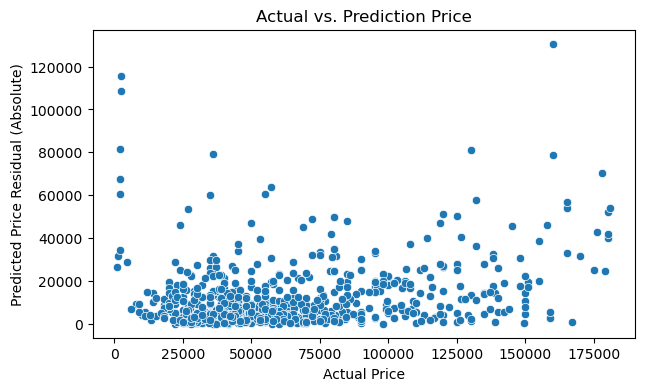

In [31]:
plt.figure(figsize=(7,4))
plot = sb.scatterplot(x=y_test, y=np.abs(y_base_rf3-y_test)).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price Residual (Absolute)')

plt.show()

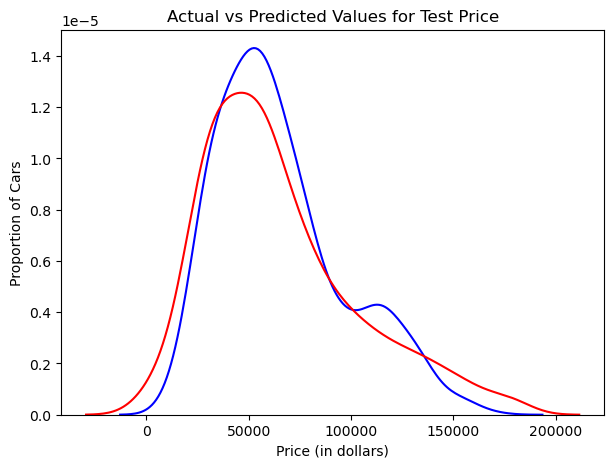

In [32]:
plt.figure(figsize=(7,5))
ax=sb.distplot(y_base_rf3,hist=False,color="b",label="Fitted Values")
sb.distplot(y_test,hist=False,color="r",label="Actual Values",ax=ax)

plt.title("Actual vs Predicted Values for Test Price")
plt.xlabel("Price (in dollars)")
plt.ylabel("Proportion of Cars")

plt.show()
plt.close()

### Prediksi harga negosiasi

In [33]:
# tune_rf3[1].regressor_
m

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gear_Type', 'Origin',
                                                   'Options']),
                                                 ('binary_encoding',
                                                  BinaryEncoder(),
                                                  ['Type', 'Region', 'Make']),
                                                 ('minmax_sc', RobustScaler(),
                                                  ['Engine_Size', 'Mileage',
                                                   'Age'])])),
                ('model', RandomForestRegressor(random_state=42))])

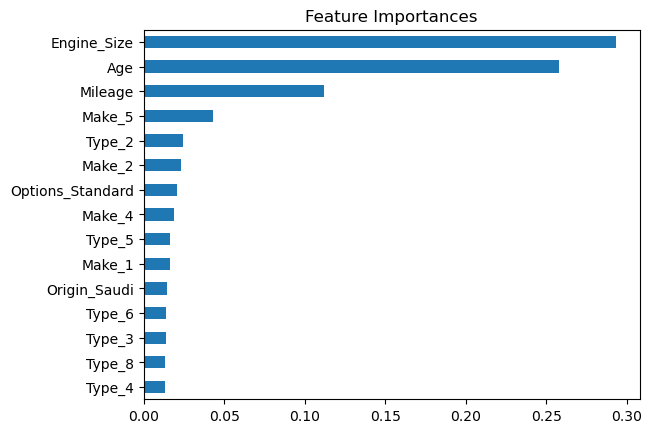

In [34]:
m.fit(X_trainvaltest,y_trainvaltest)


importances = m[1].feature_importances_

dummy_var=list(m[0].transformers_[0][1].get_feature_names_out())
binary_var=list(m[0].transformers_[1][1].get_feature_names_out())
features=dummy_var+binary_var+['Engine_Size','Mileage','Age']

feature_imp = pd.Series(importances,features).sort_values(ascending = True).tail(15)
# sb.barplot(feature_imp)
feature_imp.plot(kind='barh', title='Feature Importances')
plt.show()

In [35]:
# tune_rf3.fit(X_trainval,y_trainval)


# importances = tune_rf3[1].regressor_.feature_importances_

# dummy_var=list(tune_rf3[0].transformers_[0][1].get_feature_names_out())
# binary_var=list(tune_rf3[0].transformers_[1][1].get_feature_names_out())
# features=dummy_var+binary_var+['Engine_Size','Mileage','Age']

# feature_imp = pd.Series(importances,features).sort_values(ascending = True).tail(15)
# feature_imp.plot(kind='barh', title='Feature Importances')
# plt.show()


Pada model ini, fitur yang signifikan untuk menentukan harga yaitu Age, Engine_Size dan Mileage, disusul di belakangnya yaitu Make_5 dan Region_0.
Dapat disimpulkan bahwa variabel numerik memiliki pengaruh yang lebih dominan dibandingkan dengan variabel kategorik pada model ini.

In [36]:
y_topred_pred=m.predict(X_topred)
y_topred_pred

array([ 35630.  , 142405.6 ,  61285.49, ...,  37890.  ,  63408.8 ,
       114740.  ])

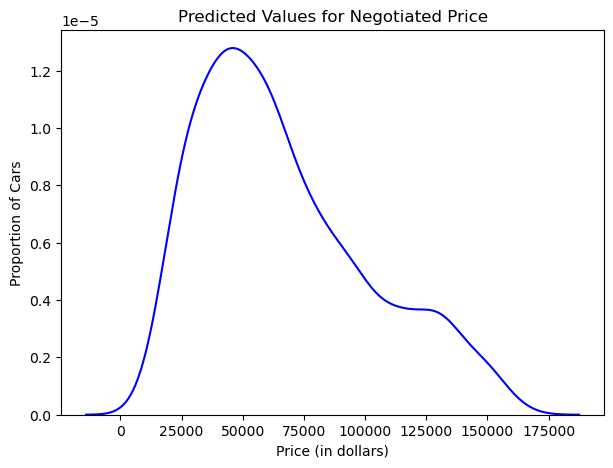

In [37]:
plt.figure(figsize=(7,5))
ax=sb.distplot(y_topred_pred,hist=False,color="b",label="Actual Values")

plt.title("Predicted Values for Negotiated Price")
plt.xlabel("Price (in dollars)")
plt.ylabel("Proportion of Cars")

plt.show()
plt.close()

Distribusi hasil prediksi tidak mengikuti distribusi normal. Hal ini disebabkan lebih banyaknya item pada rentang price yang rendah. Meskipun begitu, bila dilihat di Q-Q plot, model sudah mulai mendekati distribusi normal

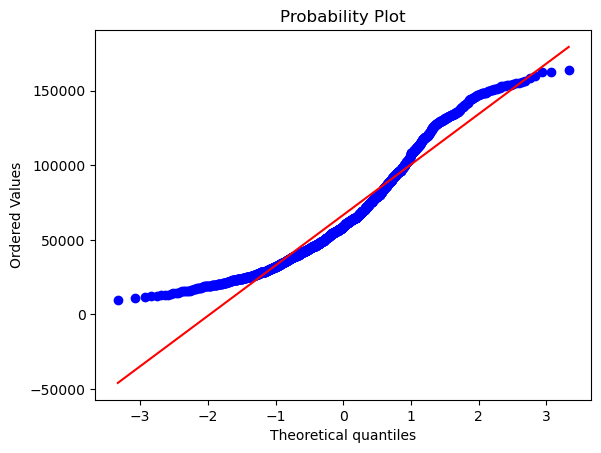

In [38]:
from scipy import stats

fig = plt.figure()
res = stats.probplot(y_topred_pred, plot=plt)
plt.show()

### Conclusion

Model yang paling sesuai untuk melakukan prediksi harga mobil yaitu Random Forest Regression. Model ini masih jauh dari ideal, mengingat Mean Absolute yang masih sangat besar, yaitu di atas 1000 riyal pada data Price. Mean Absolute Percentage Error juga lebih dari 50%, yaitu 50,4%, yang berarti prediksi yang dibuat model akan melesai maksimal hingga 55% dari nilai prediksi. Fitur yang paling berpengaruh dalam regresi ini yaitu Engine_Size (ukuran mesin), Age (usia mobil) serta Mileage (mil pada odometer).

### Recommendation

1. Melakukan improvisasi pada encoding sehingga dapat berkontribusi lebih pada model. Dalam eksplorasi data yang dilakukan, di sejumlah variabel prediktor kategorik terdapat perbedaan Price antara setiap value kategorik, namun tidak berpengaruh besar pada modl keseluruhan. Adanya variabel interaksi atau metode encoding ordinal mungkin akan menangkap lebih jelas keragaman ini.
2. Jumlah error yang besar pada hasil prediksi mengindikasikan adanya variabel yang belum terakomodasi, sehingga disarankan untuk isolasi prediksi yang paling melaeset dan temukan variabel mana saha yang dapat menjelaskan variasi ini. 
3. Melakukan augmentasi data dengan fitur-fitur baru. Pada kolom Options informasi yang didapatkan terlalu umum (opsi lengkap, sebagian atau minimum), namun bisa diperkaya dengan informasi spesifik fitur apa yang ditambahkan ke mobil (soundd system, alarm, power window dll.)



In [39]:
# export selected model

import pickle
filename='model_rf_saudi_auto.sav'
pickle.dump(m,open(filename,'wb'))
loaded_model=pickle.load(open(filename,'rb'))

loaded_model



Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gear_Type', 'Origin',
                                                   'Options']),
                                                 ('binary_encoding',
                                                  BinaryEncoder(),
                                                  ['Type', 'Region', 'Make']),
                                                 ('minmax_sc', RobustScaler(),
                                                  ['Engine_Size', 'Mileage',
                                                   'Age'])])),
                ('model', RandomForestRegressor(random_state=42))])